In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib import patches
import mplhep as hep
import os
from tqdm import tqdm
import ipywidgets as widget

Welcome to JupyROOT 6.26/04


In [5]:
rPath = "root://brux30.hep.brown.edu:1094//store/user/dali/"
rDir_step1 = rPath + "FWLJMET106XUL_singleLep2017UL_RunIISummer20_3t_step1hadds/nominal/"
rDir = rPath + "FWLJMET106XUL_singleLep2017UL_RunIISummer20_3t_step3/nominal/"
nTree = "ljmet"
fSIG = [
    "TTTT_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root"
]
fBKG = [
    "ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
    "ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8_hadd.root",
    "ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8_hadd.root",
    "ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    "ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    "TTTJ_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTTW_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTHH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTWH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTWW_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTWZ_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTZH_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTZZ_TuneCP5_13TeV-madgraph-pythia8_hadd.root",
    "TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
    "TTWJetsToQQ_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_hadd.root", 
    "TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_hadd.root",
    "TTZToLL_M-1to10_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root",
    "ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    "ttHToNonbb_M125_TuneCP5_13TeV-powheg-pythia8_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root",
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root",
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root",
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_tt1b_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_tt2b_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttbb_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttcc_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_1_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_2_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_3_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_4_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_5_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_6_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_7_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_8_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_9_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_10_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_tt1b_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_tt2b_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttbb_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttcc_hadd.root",
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttjj_hadd.root",
]

In [6]:
lumi = {
    "2016APV": 19520,
    "2016": 16810. * 0.995,
    "2017": 41480.,
    "2018": 59832.
}
xsec = {
    "TTTW_TuneCP5_13TeV-madgraph-pythia8_hadd.root": 0.0003974,
    "TTTJ_TuneCP5_13TeV-madgraph-pythia8_hadd.root": 0.0007314,
    "ST_s-channel_4f_leptonDecays_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root": 3.44,
    "ST_t-channel_top_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8_hadd.root": 136.02,
    "ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5_13TeV-powheg-madspin-pythia8_hadd.root": 80.95,
    "ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8_hadd.root": 35.83,
    "ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8_hadd.root": 35.83,
    "TTTT_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root": 0.01197,
    "TTHH_TuneCP5_13TeV-madgraph-pythia8_hadd.root": 0.0006655,
    "TTWH_TuneCP5_13TeV-madgraph-pythia8_hadd.root": 0.001141,
    "TTWW_TuneCP5_13TeV-madgraph-pythia8_hadd.root": 0.00703,
    "TTWZ_TuneCP5_13TeV-madgraph-pythia8_hadd.root": 0.002453,
    "TTZH_TuneCP5_13TeV-madgraph-pythia8_hadd.root": 0.00113,
    "TTZZ_TuneCP5_13TeV-madgraph-pythia8_hadd.root": 0.001385,
    "TTZToLLNuNu_M-10_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root": 0.2439,
    "TTWJetsToQQ_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_hadd.root": 0.4377, 
    "TTWJetsToLNu_TuneCP5_13TeV-amcatnloFXFX-madspin-pythia8_hadd.root": 0.2161,
    "TTZToLL_M-1to10_TuneCP5_13TeV-amcatnlo-pythia8_hadd.root": 0.05324,
    "ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8_hadd.root": 0.291,
    "ttHToNonbb_M125_TuneCP5_13TeV-powheg-pythia8_hadd.root": 0.209,
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root": 831.8 * 0.105,
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root": 831.8 * 0.105,
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root": 831.8 * 0.105,
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root": 831.8 * 0.105,
    "TTTo2L2Nu_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root": 831.8 * 0.105,
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root": 831.8 * 0.457,
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root": 831.8 * 0.457,
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root": 831.8 * 0.457,
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root": 831.8 * 0.457,
    "TTToHadronic_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root": 831.8 * 0.457,
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_tt1b_hadd.root": 2.251,
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_tt2b_hadd.root": 2.251,
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttbb_hadd.root": 2.251,
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttcc_hadd.root": 2.251,
    "TTToSemiLepton_HT500Njet9_TuneCP5_13TeV-powheg-pythia8_ttjj_hadd.root": 2.251,
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_tt1b_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_tt2b_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttbb_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttcc_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_1_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_2_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_3_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_4_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_5_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_6_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_7_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_8_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_9_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT0Njet0_ttjj_10_hadd.root": 831.8 * 0.438 * ( 1 - 0.00618 ),
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_tt1b_hadd.root": 831.8 * 0.438 * 0.00618,
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_tt2b_hadd.root": 831.8 * 0.438 * 0.00618,
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttbb_hadd.root": 831.8 * 0.438 * 0.00618,
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttcc_hadd.root": 831.8 * 0.438 * 0.00618,
    "TTToSemiLeptonic_TuneCP5_13TeV-powheg-pythia8_HT500Njet9_ttjj_hadd.root": 831.8 * 0.438 * 0.00618,
}

In [7]:
norm = {}
year = "2017"
for file in tqdm(fSIG):
    rFile = ROOT.TFile.Open( rDir_step1 + file )
    rTree = rFile.Get( "NumTrueHist" ).Clone( "NumTrueHist" )
    nTrueHist = rTree.Integral()
    norm[file] = lumi[year] * xsec[file] / nTrueHist
    rFile.Close()
    del rFile, rTree, nTrueHist
for file in tqdm(fBKG):
    if "TTToSemiLeptonic" in file and "HT0Njet0_ttjj" in file:
        nTrueHist = 0
        for i in range(1,11):
            rFile = ROOT.TFile.Open( rDir_step1 + file.split( "ttjj" )[0] + "ttjj_{}_hadd.root".format(i) )
            rTree = rFile.Get( "NumTrueHist" ).Clone( "NumTrueHist" )
            nTrueHist += rTree.Integral()
            rFile.Close()
            del rFile, rTree
        norm[file] = lumi[year] * xsec[file] / nTrueHist
        del nTrueHist
    else:
        rFile = ROOT.TFile.Open( rDir_step1 + file )
        rTree = rFile.Get( "NumTrueHist" ).Clone( "NumTrueHist" )
        nTrueHist = rTree.Integral()
        norm[file] = lumi[year] * xsec[file] / nTrueHist
        rFile.Close()
        del rFile, rTree, nTrueHist

100%|██████████| 53/53 [01:44<00:00,  1.97s/it]


In [8]:
ROOT.gInterpreter.Declare("""
float compute_weight( float norm, float triggerXSF, float triggerSF, float pileupWeight, float pileupJetIDWeight, float lepIdSF, float isoSF, float L1NonPrefiringProb_CommonCalc, float MCWeight_MultiLepCalc, float tthfWeight, float btagDeepJetWeight, float btagDeepJet2DWeight_HTnj ){
    return norm * triggerXSF * triggerSF * pileupWeight * pileupJetIDWeight * lepIdSF * isoSF * L1NonPrefiringProb_CommonCalc * ( MCWeight_MultiLepCalc / abs( MCWeight_MultiLepCalc ) ) * tthfWeight * btagDeepJetWeight * btagDeepJet2DWeight_HTnj;
}
""")

True

In [9]:
ROOT.gInterpreter.Declare("""
float compute_weight_ttbar( float norm, float triggerXSF, float triggerSF, float pileupWeight, float pileupJetIDWeight, float topPtWeight13TeV, float lepIdSF, float isoSF, float L1NonPrefiringProb_CommonCalc, float MCWeight_MultiLepCalc, float tthfWeight, float btagDeepJetWeight, float btagDeepJet2DWeight_HTnj ){
    return norm * triggerXSF * triggerSF * pileupWeight * pileupJetIDWeight * topPtWeight13TeV * lepIdSF * isoSF * L1NonPrefiringProb_CommonCalc * ( MCWeight_MultiLepCalc / abs( MCWeight_MultiLepCalc ) ) * tthfWeight * btagDeepJetWeight * btagDeepJet2DWeight_HTnj;
}
""")

True

In [10]:
branches = [ branch for branch in ROOT.RDataFrame( nTree, rDir + fSIG[0] ).GetColumnNames() ]
branch = widget.SelectMultiple( 
    options = branches, 
    value = ( 
        'AK4HTpMETpLepPt',
        'NresolvedTops1pFake',
        'leptonPt_MultiLepCalc',
        'mass_lepBJet_mindr',
        'minDR_lepBJet',
        'theJetLeadPt',
        'thirdcsvb_bb' 
    )
)
branch

SelectMultiple(index=(1, 206, 357, 362, 380, 471, 477), options=('AK4HT', 'AK4HTpMETpLepPt', 'AK4JetBTag_Multi…

In [11]:
df_sig = {}

for file in tqdm( fSIG ):
    rDF = ROOT.RDataFrame( nTree, rDir + file )
    wDF = rDF.Define( "weight", "compute_weight( {}, triggerXSF, triggerSF, pileupWeight, pileupJetIDWeight, lepIdSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, tthfWeight, btagDeepJetWeight, btagDeepJet2DWeight_HTnj )".format( norm[file] ) )
    fDF = wDF.Filter( "minDR_lepJet > 0.4" ).Filter( "DataPastTriggerX == 1 && MCPastTriggerX == 1" )
    df_sig[file] = fDF.AsNumpy( columns = [ "NJets_JetSubCalc", "NJetsCSV_JetSubCalc", "DNN_1to40_3t", "AK4HT", "MT_lepMet", "corr_met_MultiLepCalc", "weight" ] + list(branch.value) )

100%|██████████| 1/1 [00:59<00:00, 59.80s/it]


In [12]:
df_bkg = {}

for file in tqdm( fBKG ):
    rDF = ROOT.RDataFrame( nTree, rDir + file )
    if file.startswith( "TTTo" ):
        wDF = rDF.Define( "weight", "compute_weight_ttbar( {}, triggerXSF, triggerSF, pileupWeight, pileupJetIDWeight, topPtWeight13TeV, lepIdSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, tthfWeight, btagDeepJetWeight, btagDeepJet2DWeight_HTnj )".format( norm[file] ) )
    else:
        wDF = rDF.Define( "weight", "compute_weight( {}, triggerXSF, triggerSF, pileupWeight, pileupJetIDWeight, lepIdSF, isoSF, L1NonPrefiringProb_CommonCalc, MCWeight_MultiLepCalc, tthfWeight, btagDeepJetWeight, btagDeepJet2DWeight_HTnj )".format( norm[file] ) )
    fDF = wDF.Filter( "minDR_lepJet > 0.4" ).Filter( "DataPastTriggerX == 1 && MCPastTriggerX == 1" )
    df_bkg[file] = fDF.AsNumpy( columns = [ "NJets_JetSubCalc", "NJetsCSV_JetSubCalc", "DNN_1to40_3t", "AK4HT", "MT_lepMet", "corr_met_MultiLepCalc", "weight" ] + list(branch.value) )
    del rDF, wDF, fDF

100%|██████████| 53/53 [09:59<00:00, 11.32s/it]


In [27]:
cuts = {
    "HT": 500.,
    "MET": 60., 
    "MT": 60.,
    "DNN": 0.,
}

In [30]:
sig_filt = {}
bkg_filt = {}

print( "Filtering signal files" )
for file in tqdm( df_sig ):
    sig_filt[file] = ( df_sig[file][ "AK4HT" ] > cuts["HT"] ) & ( df_sig[file][ "corr_met_MultiLepCalc" ] > cuts[ "MET" ] ) & ( df_sig[file][ "MT_lepMet" ] > cuts[ "MT" ] ) & ( df_sig[file][ "DNN_1to40_3t" ] > cuts[ "DNN" ] ) 

print( "Filtering background files" )
for file in tqdm( df_bkg ):
    bkg_filt[file] = ( df_bkg[file][ "AK4HT" ] > cuts["HT"] ) & ( df_bkg[file][ "corr_met_MultiLepCalc" ] > cuts[ "MET" ] ) & ( df_bkg[file][ "MT_lepMet" ] > cuts[ "MT" ] ) &  ( df_bkg[file][ "DNN_1to40_3t" ] > cuts[ "DNN" ] )

Filtering signal files


100%|██████████| 1/1 [00:00<00:00, 126.38it/s]


Filtering background files


100%|██████████| 53/53 [00:00<00:00, 470.78it/s]


In [31]:
nB_bins = np.linspace(0,7,8)
nJ_bins = np.linspace(4,12,9)
hist_sig = {}
hist_bkg = {}

for file in df_sig:
    hist_sig[file] = np.histogram2d( df_sig[file][ "NJets_JetSubCalc" ][ sig_filt[file] ], df_sig[file][ "NJetsCSV_JetSubCalc" ][ sig_filt[file] ], bins = [ nJ_bins, nB_bins ], weights = df_sig[file][ "weight" ][ sig_filt[file] ] )
    
for file in df_bkg:
    hist_bkg[file] = np.histogram2d( df_bkg[file][ "NJets_JetSubCalc" ][ bkg_filt[file] ], df_bkg[file][ "NJetsCSV_JetSubCalc" ][ bkg_filt[file] ], bins = [ nJ_bins, nB_bins ], weights = df_bkg[file][ "weight" ][ bkg_filt[file] ] )
    
sig_tot = np.sum( [ hist_sig[file][0] for file in hist_sig ], axis = 0 )
bkg_tot = np.sum( [ hist_bkg[file][0] for file in hist_bkg ], axis = 0 )
signal_strength = sig_tot / np.sqrt( sig_tot + bkg_tot )
signal_fraction = sig_tot / np.sum( sig_tot )
signal_ratio = sig_tot / bkg_tot

/tmp/ipykernel_521/2174773822.py:14: RuntimeWarning: invalid value encountered in true_divide
  signal_strength = sig_tot / np.sqrt( sig_tot + bkg_tot )
/tmp/ipykernel_521/2174773822.py:16: RuntimeWarning: invalid value encountered in true_divide
  signal_ratio = sig_tot / bkg_tot


In [55]:
region_set = {
    "ANALYSIS": {
        "nJ6pnB3p": {
            "hlines": [ 0.5, 1.5 ],
            "vlines": [ 1.5, 2.5 ],
            "height": [ 1.5, 6.5 ],
            "width":  [ -0.5, 7.5 ],
            "X": [ 2, 0 ],
            "A": [ 2, 1 ],
            "B": [ 2, 2 ],
            "Y": [ 3, 0 ],
            "C": [ 3, 1 ],
            "D": [ 3, 2 ]
        },
        "nJ6pnB2p": {
            "hlines": [ 0.5, 1.5 ],
            "width":  [ 0.5, 7.5 ],
            "vlines": [ 0.5, 1.5 ],
            "height": [ -0.5, 6.5 ],
            "X": [ 0, 1 ],
            "A": [ 1, 1 ],
            "B": [ 2, 1 ],
            "Y": [ 0, 2 ],
            "C": [ 1, 2 ],
            "D": [ 2, 2 ]
        },
        "nJ6pnB2p_4t": {
            "hlines": [ 0.5, 1.5 ],
            "width":  [ -0.5, 7.5 ],
            "vlines": [ 0.5, 1.5 ],
            "height": [ 0.5, 6.5 ],
            "X": [ 1, 0 ],
            "A": [ 1, 1 ],
            "B": [ 1, 2 ],
            "Y": [ 2, 0 ],
            "C": [ 2, 1 ],
            "D": [ 2, 2 ]
        },
        "nJ6pnB1p": {
            "hlines": [ 0.5, 1.5 ],
            "width":  [ -0.5, 7.5 ],
            "vlines": [ 0.5 ],
            "height": [ -0.5, 6.5 ],
            "X": [ 0, 0 ],
            "A": [ 0, 1 ],
            "B": [ 0, 2 ],
            "Y": [ 1, 0 ],
            "C": [ 1, 1 ],
            "D": [ 1, 2 ]
        },
        "nJ5pnB2p": {
            "hlines": [ 0.5 ],
            "width":  [ -0.5, 7.5 ],
            "vlines": [ 0.5, 1.5 ],
            "height": [ -0.5, 6.5 ],
            "X": [ 0, 0 ],
            "A": [ 1, 0 ],
            "B": [ 2, 0 ],
            "Y": [ 0, 1 ],
            "C": [ 1, 1 ],
            "D": [ 2, 1 ]
        }

    },
    "VALIDATION": {
        "nJ6nB2": {
            "hlines": [ 0.5, 1.5, 2.5 ],
            "vlines": [ 0.5, 1.5, 2.5 ],
            "height": [ 0.5, 2.5 ],
            "width":  [ -0.5, 2.5 ],
            "X": [ 1, 0 ],
            "A": [ 1, 1 ],
            "B": [ 1, 2 ],
            "Y": [ 2, 0 ],
            "C": [ 2, 1 ],
            "D": [ 2, 2 ]
        },
        "nJ6nB1": {
            "hlines": [ 0.5, 1.5, 2.5 ],
            "vlines": [ -0.5, 0.5, 1.5 ],
            "height": [ -0.5, 1.5 ],
            "width":  [ -0.5, 2.5 ],
            "X": [ 0, 0 ],
            "A": [ 0, 1 ],
            "B": [ 0, 2 ],
            "Y": [ 1, 0 ],
            "C": [ 1, 1 ],
            "D": [ 1, 2 ]
        }
    }
}

In [56]:
tag_region = "ANALYSIS"
tag_SR = "nJ6pnB2p_4t"
region_lines = True
region_params = region_set[ tag_region ][ tag_SR ]

cumulative_fraction = {
    region: 0 for region in [ "X", "Y", "A", "B", "C", "D" ]
}
cumulative_sensitivity = {
    region: 0 for region in [ "X", "Y", "A", "B", "C", "D" ]
}
cumulative_sum_sig = {
    region: 0 for region in [ "X", "Y", "A", "B", "C", "D" ]
}
cumulative_sum_bkg = {
    region: 0 for region in [ "X", "Y", "A", "B", "C", "D" ]
}
for nJ in range( signal_fraction.shape[0] ):
    for nB in range( signal_fraction.shape[1] ):
        if (nJ,nB) == (region_params["X"][1],region_params["X"][0]): 
            cumulative_fraction[ "X" ] += signal_fraction[ nJ, nB ]
            cumulative_sum_sig[ "X" ] += sig_tot[ nJ, nB ]
            cumulative_sum_bkg[ "X" ] += bkg_tot[ nJ, nB ]
        elif (nJ,nB) == (region_params["A"][1],region_params["A"][0]): 
            cumulative_fraction[ "A" ] += signal_fraction[ nJ, nB ]
            cumulative_sum_sig[ "A" ] += sig_tot[ nJ, nB ]
            cumulative_sum_bkg[ "A" ] += bkg_tot[ nJ, nB ]
        elif nJ == (region_params["Y"][1]) and nB >= (region_params["Y"][0]): 
            cumulative_fraction[ "Y" ] += signal_fraction[ nJ, nB ]
            cumulative_sum_sig[ "Y" ] += sig_tot[ nJ, nB ]
            cumulative_sum_bkg[ "Y" ] += bkg_tot[ nJ, nB ]
        elif nJ >= (region_params["B"][1]) and nB == (region_params["B"][0]): 
            cumulative_fraction[ "B" ] += signal_fraction[ nJ, nB ]
            cumulative_sum_sig[ "B" ] += sig_tot[ nJ, nB ]
            cumulative_sum_bkg[ "B" ] += bkg_tot[ nJ, nB ]
        elif nJ == (region_params["C"][1]) and nB >= (region_params["C"][0]): 
            cumulative_fraction[ "C" ] += signal_fraction[ nJ, nB ]
            cumulative_sum_sig[ "C" ] += sig_tot[ nJ, nB ]
            cumulative_sum_bkg[ "C" ] += bkg_tot[ nJ, nB ]
        elif nJ >= (region_params["D"][1]) and nB >= (region_params["D"][0]): 
            cumulative_fraction[ "D" ] += signal_fraction[ nJ, nB ]
            cumulative_sum_sig[ "D" ] += sig_tot[ nJ, nB ]
            cumulative_sum_bkg[ "D" ] += bkg_tot[ nJ, nB ]
        
cumulative_fraction[ "CONTROL TOTAL" ] = np.sum( [ cumulative_fraction[ region ] for region in [ "X", "Y", "A", "B", "C" ] ] )
cumulative_sum_sig[ "CONTROL TOTAL" ] = np.sum( [ cumulative_sum_sig[ region ] for region in [ "X", "Y", "A", "B", "C" ] ] )
cumulative_sum_bkg[ "CONTROL TOTAL" ] = np.sum( [ cumulative_sum_bkg[ region ] for region in [ "X", "Y", "A", "B", "C" ] ] )
cumulative_sensitivity[ "D" ] = cumulative_sum_sig[ "D" ] / np.sqrt( cumulative_sum_sig[ "D" ] + cumulative_sum_bkg[ "D" ] )
cumulative_sensitivity[ "CONTROL TOTAL" ] = cumulative_sum_sig[ "CONTROL TOTAL" ] / np.sqrt( cumulative_sum_sig[ "CONTROL TOTAL" ] + cumulative_sum_bkg[ "CONTROL TOTAL" ] )

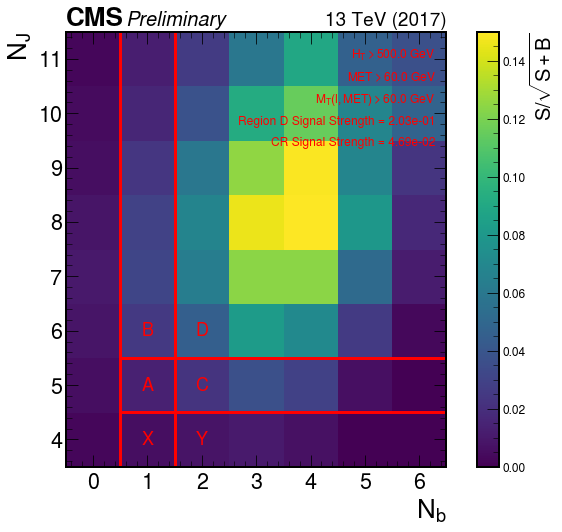

In [60]:
plt.figure( figsize = ( 11, 8 ) )
hep.cms.text( "Preliminary", fontsize = 20 )
hep.cms.lumitext( "13 TeV (2017)", fontsize = 20 )
plt.style.use( hep.style.CMS )
plt.imshow( np.nan_to_num( signal_strength ), vmin = 0, vmax = 1.5e-1, origin = "lower" ) #, interpolation = "gaussian" )
cb = plt.colorbar()
cb.set_label( label = r"$S/\sqrt{S+B}$", fontsize = 20 )
cb.ax.tick_params( labelsize = 12 )
plt.xticks( ticks = np.linspace(0,6,7), labels = np.linspace(0,6,7).astype(int) )
plt.xlabel( r"$N_b$", x = 1.0, ha = "right" )
plt.yticks( ticks = np.linspace(0,7,8), labels = np.linspace(4,11,8).astype(int) )
plt.ylabel( r"$N_J$", y = 1.0, ha = "right" )
if region_lines:
    plt.hlines( region_params[ "hlines" ], region_params[ "height" ][0], region_params[ "height" ][1], "red", lw = 3 )
    plt.vlines( region_params[ "vlines" ], region_params[ "width" ][0], region_params[ "width" ][1], "red", lw = 3 )
    plt.text( region_params[ "X" ][0], region_params[ "X" ][1], "X", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "A" ][0], region_params[ "A" ][1], "A", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "B" ][0], region_params[ "B" ][1], "B", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "Y" ][0], region_params[ "Y" ][1], "Y", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "C" ][0], region_params[ "C" ][1], "C", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "D" ][0], region_params[ "D" ][1], "D", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( 6.3, 7.0, r"$H_T>{}$ GeV".format( cuts[ "HT" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 6.6, r"$MET>{}$ GeV".format( cuts[ "MET" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 6.2, r"$M_T(l,MET)>{}$ GeV".format( cuts[ "MT" ] ), fontsize = 12, color = "red", ha = "right" )
    #plt.text( 6.3, 6.2, r"$DNN>{}$".format( cuts[ "DNN" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 5.8, "Region D Signal Strength = {:.2e}".format( cumulative_sensitivity["D"] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 5.4, "CR Signal Strength = {:.2e}".format( cumulative_sensitivity["CONTROL TOTAL"] ), fontsize = 12, color = "red", ha = "right" )
else:
    for nj in range( signal_strength.shape[0] ):
        for nb in range( signal_strength.shape[1] ):
            if nb >= 5 and nj <= 1: continue
            color = "white" if np.nan_to_num( signal_strength[nj,nb] ) < 0.06 else "black"
            plt.text( nb, nj, "{:.2e}".format( signal_strength[nj,nb] ), fontsize = 10, color = color, ha = "center", va = "center" )
    plt.text( 6.3, 0.8, r"$H_T>{}$ GeV".format( cuts[ "HT" ] ), fontsize = 9, color = "red", ha = "right" )
    plt.text( 6.3, 0.4, r"$MET>{}$ GeV".format( cuts[ "MET" ] ), fontsize = 9, color = "red", ha = "right" )
    plt.text( 6.3, 0.0, r"$M_T(l,MET)>{}$ GeV".format( cuts[ "MT" ] ), fontsize = 9, color = "red", ha = "right" )
    #plt.text( 6.3, 0.0, r"$DNN>{}$".format( cuts[ "DNN" ] ), fontsize = 12, color = "red", ha = "right" )
plt.show()
plt.close()

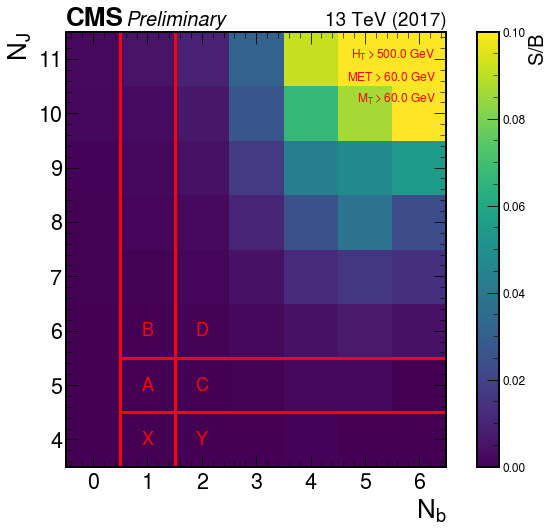

In [61]:
plt.figure( figsize = ( 11, 8 ) )
hep.cms.text( "Preliminary", fontsize = 20 )
hep.cms.lumitext( "13 TeV (2017)", fontsize = 20 )
plt.style.use( hep.style.CMS )
plt.imshow( np.nan_to_num( signal_ratio ), vmin = 0, vmax = 0.1, origin = "lower" ) #, interpolation = "gaussian" )
cb = plt.colorbar()
cb.set_label( label = r"$S/B$", fontsize = 20 )
cb.ax.tick_params( labelsize = 12 )
plt.xticks( ticks = np.linspace(0,6,7), labels = np.linspace(0,6,7).astype(int) )
plt.xlabel( r"$N_b$", x = 1.0, ha = "right" )
plt.yticks( ticks = np.linspace(0,7,8), labels = np.linspace(4,11,8).astype(int) )
plt.ylabel( r"$N_J$", y = 1.0, ha = "right" )
if region_lines:
    plt.hlines( region_params[ "hlines" ], region_params[ "height" ][0], region_params[ "height" ][1], "red", lw = 3 )
    plt.vlines( region_params[ "vlines" ], region_params[ "width" ][0], region_params[ "width" ][1], "red", lw = 3 )
    plt.text( region_params[ "X" ][0], region_params[ "X" ][1], "X", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "A" ][0], region_params[ "A" ][1], "A", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "B" ][0], region_params[ "B" ][1], "B", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "Y" ][0], region_params[ "Y" ][1], "Y", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "C" ][0], region_params[ "C" ][1], "C", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "D" ][0], region_params[ "D" ][1], "D", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( 6.3, 7.0, r"$H_T>{}$ GeV".format( cuts[ "HT" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 6.6, r"$MET>{}$ GeV".format( cuts[ "MET" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 6.2, r"$M_T>{}$ GeV".format( cuts[ "MT" ] ), fontsize = 12, color = "red", ha = "right" )
    #plt.text( 6.3, 6.2, r"$DNN>{}$".format( cuts[ "DNN" ] ), fontsize = 12, color = "red", ha = "right" )
else:
    for nj in range( signal_ratio.shape[0] ):
        for nb in range( signal_ratio.shape[1] ):
            if nb >= 5 and nj <= 1: continue
            color = "white" if np.nan_to_num( signal_ratio[nj,nb] ) < 0.04 else "black"
            plt.text( nb, nj, "{:.2e}".format( signal_ratio[nj,nb] ), fontsize = 10, color = color, ha = "center", va = "center" )
    plt.text( 6.3, 0.8, r"$H_T>{}$ GeV".format( cuts[ "HT" ] ), fontsize = 9, color = "red", ha = "right" )
    plt.text( 6.3, 0.4, r"$MET>{}$ GeV".format( cuts[ "MET" ] ), fontsize = 9, color = "red", ha = "right" )
    #plt.text( 6.3, 0.0, r"$DNN>{}$".format( cuts[ "DNN" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 0.0, r"$M_T(l,MET)>{}$ GeV".format( cuts[ "MT" ] ), fontsize = 9, color = "red", ha = "right" )
patches.Rectangle( (1,1), 2, 2 )
plt.show()
plt.close()

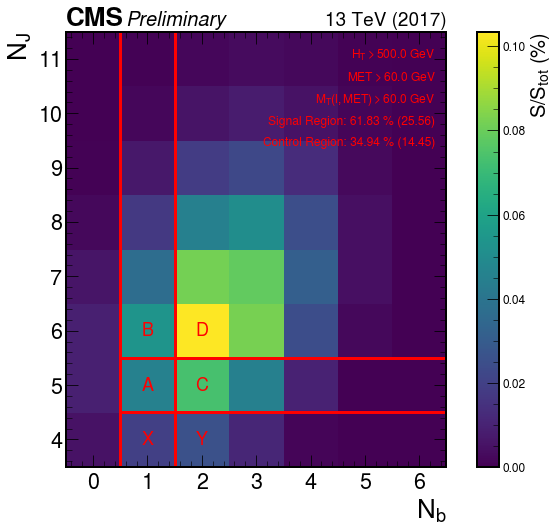

In [59]:
plt.figure( figsize = ( 11, 8 ) )
hep.cms.text( "Preliminary", fontsize = 20 )
hep.cms.lumitext( "13 TeV (2017)", fontsize = 20 )
plt.style.use( hep.style.CMS )
plt.imshow( np.nan_to_num( signal_fraction ), origin = "lower" ) #, interpolation = "gaussian" )
cb = plt.colorbar()
cb.set_label( label = r"$S/S_{tot}$ (%)", fontsize = 20 )
cb.ax.tick_params( labelsize = 12 )
plt.xticks( ticks = np.linspace(0,6,7), labels = np.linspace(0,6,7).astype(int) )
plt.xlabel( r"$N_b$", x = 1.0, ha = "right" )
plt.yticks( ticks = np.linspace(0,7,8), labels = np.linspace(4,11,8).astype(int) )
plt.ylabel( r"$N_J$", y = 1.0, ha = "right" )
if region_lines:
    plt.hlines( region_params[ "hlines" ], region_params[ "height" ][0], region_params[ "height" ][1], "red", lw = 3 )
    plt.vlines( region_params[ "vlines" ], region_params[ "width" ][0], region_params[ "width" ][1], "red", lw = 3 )
    plt.text( region_params[ "X" ][0], region_params[ "X" ][1], "X", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "A" ][0], region_params[ "A" ][1], "A", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "B" ][0], region_params[ "B" ][1], "B", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "Y" ][0], region_params[ "Y" ][1], "Y", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "C" ][0], region_params[ "C" ][1], "C", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( region_params[ "D" ][0], region_params[ "D" ][1], "D", ha = "center", va = "center", color = "red", fontsize = 18 )
    plt.text( 6.3, 7.0, r"$H_T>{}$ GeV".format( cuts[ "HT" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 6.6, r"$MET>{}$ GeV".format( cuts[ "MET" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 6.2, r"$M_T(l,MET)>{}$ GeV".format( cuts[ "MT" ] ), fontsize = 12, color = "red", ha = "right" )
    #plt.text( 6.3, 6.2, r"$DNN>{}$".format( cuts[ "DNN" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 5.8, "Signal Region: {:.2f} % ({:.2f})".format( 100. * cumulative_fraction[ "D" ], cumulative_sum_sig[ "D" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 5.4, "Control Region: {:.2f} % ({:.2f})".format( 100. * cumulative_fraction[ "CONTROL TOTAL" ], cumulative_sum_sig[ "CONTROL TOTAL" ] ), fontsize = 12, color = "red", ha = "right" )
else:
    for nj in range( signal_fraction.shape[0] ):
        for nb in range( signal_fraction.shape[1] ):
            if nb >= 5 and nj <= 1: continue
            color = "white" if np.nan_to_num( signal_fraction[nj,nb] ) < 0.35 * np.max( np.nan_to_num( signal_fraction ) ) else "black"
            plt.text( nb, nj + 0.05, "{:.1f}%".format( 100.*signal_fraction[nj,nb] ), fontsize = 10, color = color, ha = "center", va = "bottom" )
            plt.text( nb, nj - 0.05, "( {:.2f} )".format(sig_tot[nj,nb]), fontsize = 10, color = color, ha = "center", va = "top" )
    plt.text( 6.3, 1.0,  r"$H_T>{}$ GeV".format( cuts[ "HT" ] ), fontsize = 9, color = "red", ha = "right" )
    plt.text( 6.3, 0.6,  r"$MET>{}$ GeV".format( cuts[ "MET" ] ), fontsize = 9, color = "red", ha = "right" )
    #plt.text( 6.3, 0.2,  r"$DNN>{}$".format( cuts[ "DNN" ] ), fontsize = 12, color = "red", ha = "right" )
    plt.text( 6.3, 0.2,  r"$M_T(l,MET)>{}$ GeV".format( cuts[ "MT" ] ), fontsize = 9, color = "red", ha = "right" )
    plt.text( 6.3, -0.2, r"$N_S={:.2f}$".format( np.sum( sig_tot ) ), fontsize = 9, color = "red", ha = "right" )
plt.show()
plt.close()

In [461]:
cut_val = np.linspace( 20, 100, 9 )
variable = "leptonPt_MultiLepCalc"
cut_nJ = 4
cut_nB = 0
eff_sig = []
eff_bkg = []
sig_strength = []
sig_total_cut = 0

for cut in cut_val:
    nSigTot, nBkgTot = 0, 0
    sig_count, bkg_count = 0, 0
    for file in df_sig:
        mask = ( df_sig[file]["NJets_JetSubCalc"] >= cut_nJ ) & ( df_sig[file]["NJetsCSV_JetSubCalc" ] >= cut_nB )
        mask_cut = ( df_sig[file][variable] > cut ) & ( df_sig[file]["NJets_JetSubCalc"] >= cut_nJ ) & ( df_sig[file]["NJetsCSV_JetSubCalc" ] >= cut_nB )
        sig_count += np.sum( df_sig[file]["weight"][ mask_cut ] )
        nSigTot += np.sum( df_sig[file]["weight"][ mask ] )
    for file in df_bkg:
        mask = ( df_bkg[file]["NJets_JetSubCalc"] >= cut_nJ ) & ( df_bkg[file]["NJetsCSV_JetSubCalc" ] >= cut_nB )
        mask_cut = ( df_bkg[file][variable] > cut ) & ( df_bkg[file]["NJets_JetSubCalc"] >= cut_nJ ) & ( df_bkg[file]["NJetsCSV_JetSubCalc" ] >= cut_nB )
        bkg_count += np.sum( df_bkg[file]["weight"][ mask_cut ] )
        nBkgTot += np.sum( df_bkg[file]["weight"][ mask ] )
    eff_sig.append( sig_count / nSigTot )
    eff_bkg.append( bkg_count / nBkgTot )
    sig_strength.append( sig_count / np.sqrt( sig_count + bkg_count ) )

<Figure size 720x720 with 0 Axes>

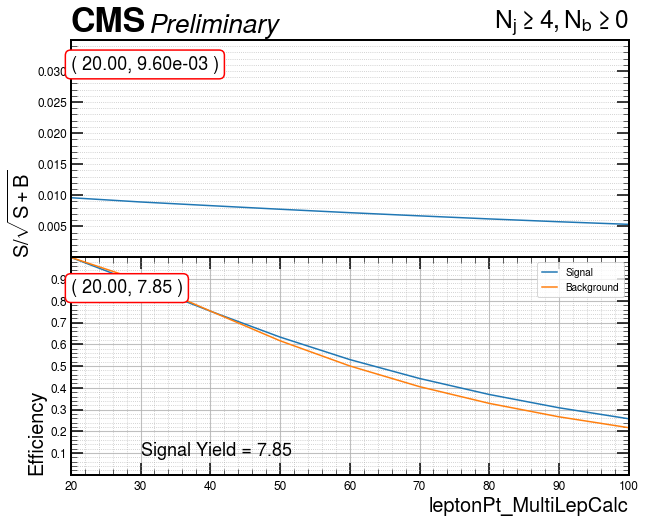

In [462]:
plt.figure()
fig, subplots = plt.subplots( 2, 1, gridspec_kw = { "height_ratios": [1,1], "hspace": 0. }, figsize = (10,8 ) )
hep.cms.lumitext( r"$N_j\geq{},N_b\geq{}$".format( cut_nJ, cut_nB ), ax = subplots[0] )
hep.cms.text( "Preliminary", ax = subplots[0] )
subplots[0].plot( cut_val, sig_strength )
subplots[0].vlines( cut_val[ np.argmax( np.nan_to_num( sig_strength ) ) ], ymin = 0, ymax = 1, color = "red" )
subplots[0].set_ylabel( r"$S/\sqrt{S+B}$", fontsize = 20, ha = "left", y = 0.0 )
#subplots[0].set_yscale( "log" )
subplots[0].set_xlim( cut_val[0], cut_val[-1] )
subplots[0].grid( which = "both" )
subplots[0].set_xticks( cut_val[::10] )
subplots[0].set_xticklabels( [] )
subplots[0].set_yticks( [0.005,0.01,0.015,0.02,0.025,0.03] )
subplots[0].tick_params( labelsize = 12, which = "major", width = 1.5 )
subplots[0].set_ylim( 0, 0.035 )
subplots[1].plot( cut_val, eff_sig, label = "Signal" )
subplots[1].plot( cut_val, eff_bkg, label = "Background" )
subplots[1].vlines( cut_val[ np.argmax( np.nan_to_num( sig_strength ) ) ], ymin = 0, ymax = 1, color = "red" )
subplots[1].set_ylabel( "Efficiency", fontsize = 20, ha = "left", y = 0.0 )
subplots[1].set_yticks( [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] )
subplots[1].tick_params( labelsize = 12, which = "major", width = 1.5 )
subplots[1].set_ylim( 0, 1 )
subplots[1].set_xlabel( variable, fontsize = 20, ha = "right", x = 1.0 )
subplots[1].set_xlim( cut_val[0], cut_val[-1] )
subplots[1].grid( which = "both" )
subplots[1].grid( which = "minor", linestyle = ":" )
subplots[1].grid( which = "major", linestyle = "-", linewidth = 1.1 )
subplots[0].text( 
    cut_val[ np.argmax( np.nan_to_num( sig_strength ) ) ], 0.0325,
    "( {:.2f}, {:.2e} )".format( cut_val[ np.argmax( np.nan_to_num( sig_strength ) ) ], np.max( np.nan_to_num( sig_strength ) ) ),
    ha = "left", va = "top",
    bbox = dict( boxstyle = "Round", fc = "white", ec = "red", lw = 1.5 ), 
    fontsize = 18
)
subplots[1].text( 
    cut_val[ np.argmax( np.nan_to_num( sig_strength ) ) ], 0.90,
    "( {:.2f}, {:.2f} )".format( cut_val[ np.argmax( np.nan_to_num( sig_strength ) ) ], nSigTot * eff_sig[ np.argmax( np.nan_to_num( sig_strength ) ) ],  ),
    ha = "left", va = "top",
    bbox = dict( boxstyle = "Round", fc = "white", ec = "red", lw = 1.5 ), 
    fontsize = 18
)
subplots[1].text( 
    cut_val[1], 0.15,
    "Signal Yield = {:.2f}".format( nSigTot ),
    ha = "left", va = "top",
    fontsize = 18
)
#subplots[1].legend( loc = 9, facecolor = "white", frameon = True, fontsize = 10 )
subplots[1].legend( loc = 1, facecolor = "white", frameon = True, fontsize = 10 )
#subplots[1].legend( loc = 6, facecolor = "white", frameon = True, fontsize = 10 )
plt.show()
plt.show()
plt.close()

In [320]:
branch.value

('AK4HTpMETpLepPt',
 'NresolvedTops1pFake',
 'leptonPt_MultiLepCalc',
 'mass_lepBJet_mindr',
 'minDR_lepBJet',
 'theJetLeadPt',
 'thirdcsvb_bb')

In [410]:
vPlot = "theJetLeadPt"
DNN = 0.4
nJ_bins = np.linspace( 5, 6, 2 )
nB_bins = np.linspace( 2, 3, 2 )
try:
    del vHist, weights
except:
    pass
vHist = {
    "SIG": {
        nJ: {
            nB: np.array([]) for nB in nB_bins
        } for nJ in nJ_bins
    },
    "BKG": {
        nJ: {
            nB: np.array([]) for nB in nB_bins
        } for nJ in nJ_bins
    }
}
weights = {
    "SIG": {
        nJ: {
            nB: np.array([]) for nB in nB_bins
        } for nJ in nJ_bins
    },
    "BKG": {
        nJ: {
            nB: np.array([]) for nB in nB_bins
        } for nJ in nJ_bins
    }
}

for nJ in nJ_bins:
    for nB in nB_bins:
        for file in df_sig:
            mask = ( df_sig[file][ "DNN_1to40_3t" ] > DNN )
            if nJ == nJ_bins[-1]:
                mask &= ( df_sig[file][ "NJets_JetSubCalc" ] >= nJ )
            else:
                mask &= ( df_sig[file][ "NJets_JetSubCalc" ] == nJ )
            if nB == nB_bins[-1]:
                mask &= ( df_sig[file][ "NJetsCSV_JetSubCalc" ] >= nB )
            else:
                mask &= ( df_sig[file][ "NJetsCSV_JetSubCalc" ] == nB )
            vHist[ "SIG" ][ nJ ][ nB ] = np.append( vHist[ "SIG" ][ nJ ][ nB ], df_sig[file][vPlot][mask] )
            weights[ "SIG" ][ nJ ][ nB ] = np.append( weights[ "SIG" ][ nJ ][ nB ], df_sig[file]["weight"][mask] )
        for file in df_bkg:
            mask = ( df_bkg[file][ "DNN_1to40_3t" ] > DNN )
            if nJ == nJ_bins[-1]:
                mask &= ( df_bkg[file][ "NJets_JetSubCalc" ] >= nJ )
            else:
                mask &= ( df_bkg[file][ "NJets_JetSubCalc" ] == nJ )
            if nB == nB_bins[-1]:
                mask &= ( df_bkg[file][ "NJetsCSV_JetSubCalc" ] >= nB )
            else:
                mask &= ( df_bkg[file][ "NJetsCSV_JetSubCalc" ] == nB )
            vHist[ "BKG" ][ nJ ][ nB ] = np.append( vHist[ "BKG" ][ nJ ][ nB ], df_bkg[file][vPlot][mask] )
            weights[ "BKG" ][ nJ ][ nB ] = np.append( weights[ "BKG" ][ nJ ][ nB ], df_bkg[file]["weight"][mask] )

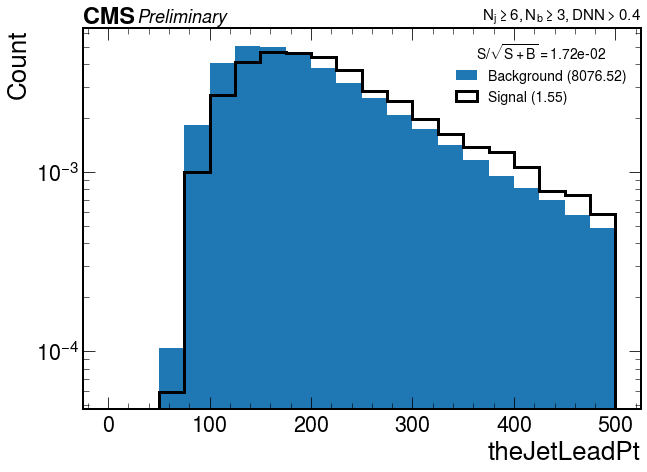

In [414]:
nJ = 6
nB = 3
shape = True
bins = np.linspace( 0, 500, 21 )
plt.figure( figsize = (10,7))
hep.cms.text( "Preliminary", fontsize = 18 )
hep.cms.lumitext( r"$N_j\geq{},N_b\geq{},DNN>{}$".format(nJ,nB,DNN), fontsize = 16 )
nSig = np.sum( weights["SIG"][nJ][nB] )
nBkg = np.sum( weights["BKG"][nJ][nB] )
if shape:
    plt.hist( 
        vHist[ "BKG" ][nJ][nB], 
        weights = weights[ "BKG" ][nJ][nB], 
        bins = bins, 
        density = True,
        label = "Background ({:.2f})".format( nBkg ) 
    )
    plt.hist( 
        vHist[ "SIG" ][nJ][nB], 
        weights = weights[ "SIG" ][nJ][nB], 
        bins = bins, 
        density = True,
        histtype = "step",
        color = "black", lw = 3,
        label = "Signal ({:.2f})".format( nSig ) 
    )
else:
    plt.hist(
        [ vHist[ "BKG" ][nJ][nB], vHist[ "SIG" ][nJ][nB] ],
        weights = [ weights[ "BKG" ][nJ][nB], weights[ "SIG" ][nJ][nB] ],
        bins = bins,
        stacked = True,
        label = [ "Signal ({:.2f})".format( nSig ), "Background ({:.2f})".format( nBkg ) ]
    )

plt.xlabel( vPlot )
plt.yscale( "log" )
plt.ylabel( "Count" )
plt.legend( 
    title = r"$S/\sqrt{S+B}=$" + "{:.2e}".format( nSig / np.sqrt( nSig + nBkg ) ),
    loc = "best", fontsize = 14, title_fontsize = 14
)
plt.show()
plt.close()